# Github : https://github.com/Maruf-Ahmad-khan/Pattern-Recognition-And-Machine-Learning/blob/main/Statistics%20and%20missing%20value%20Imputation.ipynb

# LinkedIn: https://www.linkedin.com/in/maruf-khan-1516a4224/

In [1]:
# Load the dataset 
import pandas as pd
data_file = r"C:\InhouseInternship\majorproject7\Test set.csv"
df = pd.read_csv(data_file)
print("Shape of data", df.shape)
df.head()

Shape of data (205, 3)


,Height,Weight,Sex
0,146.323241,59.861065,Female
1,175.695412,77.863687,Male
2,183.216164,72.131992,Male
3,184.245269,77.546000,Male
4,132.302261,55.188496,Female


# Handling missing values for Numerical and Categorical features and also performing  encoding for categorical features

In [2]:
class Missing_values_Imputation:
     
     def __init__(self, df):
          self.df = df
          
     def Numeric_Features(self):
          return self.df.select_dtypes(include = 'number') 
     
     def Missing_values(self):
          return self.df.isna().sum()
     
     def Min_Max(self):
          return  self.df.describe().loc[['max', 'min'], :]

     
     

data_file = r"C:\InhouseInternship\majorproject7\Test set.csv"
df = pd.read_csv(data_file) 
obj = Missing_values_Imputation(df)
print("The numerical Features are: ")
obj.Numeric_Features()   
     

The numerical Features are: 


,Height,Weight
0,146.323241,59.861065
1,175.695412,77.863687
2,183.216164,72.131992
3,184.245269,77.546000
4,132.302261,55.188496
...,...,...
200,155.090314,77.248911
201,149.175907,93.231692
202,168.030874,63.640623
203,172.608090,55.189983


In [3]:
print("Show if there is missing values: ")
obj.Missing_values()

Show if there is missing values: 


Height    0
Weight    0
Sex       0
dtype: int64

In [4]:
print("Display Min and Max Values:")
obj.Min_Max()

Display Min and Max Values:


,Height,Weight
max,199.282251,129.410122
min,123.007006,34.726666


In [5]:
import pandas as pd
import numpy as np
import logging
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import NotFittedError

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

class Imputations:
    """
    Class for handling missing data and preprocessing using pipelines for both numerical and categorical features.

    Attributes:
        df (pd.DataFrame): The input data frame to be preprocessed.
    """
    def __init__(self, df):
        """
        Initializes the Imputations object with the dataframe.

        Args:
            df (pd.DataFrame): The dataframe containing the dataset.
        """
        self.df = df

    def _build_num_pipeline(self):
        """
        Private method to build a pipeline for numerical data preprocessing.
        Includes missing value imputation and feature scaling.

        Returns:
            Pipeline: A scikit-learn pipeline for numerical data.
        """
        logging.info("Building pipeline for numerical data.")
        return Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', StandardScaler())
        ])

    def _build_cat_pipeline(self):
        """
        Private method to build a pipeline for categorical data preprocessing.
        Includes missing value imputation and one-hot encoding.

        Returns:
            Pipeline: A scikit-learn pipeline for categorical data.
        """
        logging.info("Building pipeline for categorical data.")
        return Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(handle_unknown='ignore', sparse=False))
        ])

    def pipelines(self):
        """
        Public method to apply the preprocessing pipelines to the data frame.

        Returns:
            pd.DataFrame: The preprocessed data frame with both numerical and categorical features.
        """
        try:
            # Separate numerical and categorical columns
            num_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
            cat_cols = self.df.select_dtypes(include=['object', 'category']).columns
            
            logging.info(f"Numerical columns: {list(num_cols)}")
            logging.info(f"Categorical columns: {list(cat_cols)}")

            # Build pipelines for numeric and categorical data
            num_pipeline = self._build_num_pipeline()
            cat_pipeline = self._build_cat_pipeline()

            # Apply pipelines to numerical and categorical columns
            logging.info("Preprocessing numerical columns.")
            df_num_preprocessed = num_pipeline.fit_transform(self.df[num_cols])

            logging.info("Preprocessing categorical columns.")
            df_cat_preprocessed = cat_pipeline.fit_transform(self.df[cat_cols])

            # Convert numpy arrays to dataframes
            df_num_preprocessed = pd.DataFrame(df_num_preprocessed, columns=num_cols)
            df_cat_preprocessed = pd.DataFrame(df_cat_preprocessed, 
                                               columns=cat_pipeline.named_steps['encoder'].get_feature_names_out(cat_cols))

            # Concatenate preprocessed data
            logging.info("Concatenating preprocessed numerical and categorical data.")
            X_preprocessed = pd.concat([df_num_preprocessed, df_cat_preprocessed], axis=1)

            return X_preprocessed
        
        except NotFittedError as e:
            logging.error(f"Pipeline fitting error: {str(e)}")
            raise
        except Exception as e:
            logging.error(f"An error occurred during preprocessing: {str(e)}")
            raise

def load_data(file_path):
    """
    Loads data from a CSV file into a Pandas DataFrame.

    Args:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded data frame.
    """
    try:
        logging.info(f"Loading data from {file_path}")
        return pd.read_csv(file_path)
    except FileNotFoundError as e:
        logging.error(f"File not found: {str(e)}")
        raise
    except pd.errors.EmptyDataError as e:
        logging.error(f"Empty file: {str(e)}")
        raise
    except Exception as e:
        logging.error(f"Error loading data: {str(e)}")
        raise

if __name__ == "__main__":
    data_file = "C:/InhouseInternship/majorproject7/Test set.csv"  
    df = load_data(data_file)
    imputer = Imputations(df)
    X_preprocessed = imputer.pipelines()
    


2024-09-25 08:22:33,844 - INFO - Loading data from C:/InhouseInternship/majorproject7/Test set.csv
2024-09-25 08:22:33,848 - INFO - Numerical columns: ['Height', 'Weight']
2024-09-25 08:22:33,849 - INFO - Categorical columns: ['Sex']
2024-09-25 08:22:33,850 - INFO - Building pipeline for numerical data.
2024-09-25 08:22:33,851 - INFO - Building pipeline for categorical data.
2024-09-25 08:22:33,852 - INFO - Preprocessing numerical columns.
2024-09-25 08:22:33,860 - INFO - Preprocessing categorical columns.
2024-09-25 08:22:33,866 - INFO - Concatenating preprocessed numerical and categorical data.


In [6]:
X_preprocessed.head()

,Height,Weight,Sex_Female,Sex_Male
0,-0.961470,-0.652590,1.0,0.0
1,0.979338,0.514544,0.0,1.0
2,1.476282,0.142951,0.0,1.0
3,1.544281,0.493948,0.0,1.0
4,-1.887926,-0.955519,1.0,0.0


# Counting the number of occurences, descriptive stats,  and summary statistics , info

In [7]:
import pandas as pd

class Count_M_F:
    def __init__(self, df):
        self.df = df

    def Count_Num(self):
        # Grouping by 'Sex' and counting the number of occurrences
        return (self.df.groupby('Sex')
                    .agg(Total_Count=("Sex", "count"))
                    .reset_index()
                    .sort_values(by='Total_Count', ascending=False))
     
    def Find_Min_Max(self):
          # Finding descriptive stats
          return self.df.describe()
     
    def Info(self):
         return self.df.info(), self.df.shape ,  self.df.head()

     
data_file = "C:/InhouseInternship/majorproject7/Test set.csv"
df = pd.read_csv(data_file)
counts = Count_M_F(df)
counts.Count_Num()

,Sex,Total_Count
1,Male,106
0,Female,99


In [8]:
counts.Find_Min_Max()

,Height,Weight
count,205.000000,205.000000
mean,160.874125,69.927028
std,15.171040,15.462396
min,123.007006,34.726666
25%,148.942667,58.583137
50%,161.749388,69.544469
75%,172.608090,77.964667
max,199.282251,129.410122


In [9]:
counts.Info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  205 non-null    float64
 1   Weight  205 non-null    float64
 2   Sex     205 non-null    object 
dtypes: float64(2), object(1)
memory usage: 4.9+ KB


(None,
 (205, 3),
        Height     Weight     Sex
 0  146.323241  59.861065  Female
 1  175.695412  77.863687    Male
 2  183.216164  72.131992    Male
 3  184.245269  77.546000    Male
 4  132.302261  55.188496  Female)

# Frequency count of Male and Female

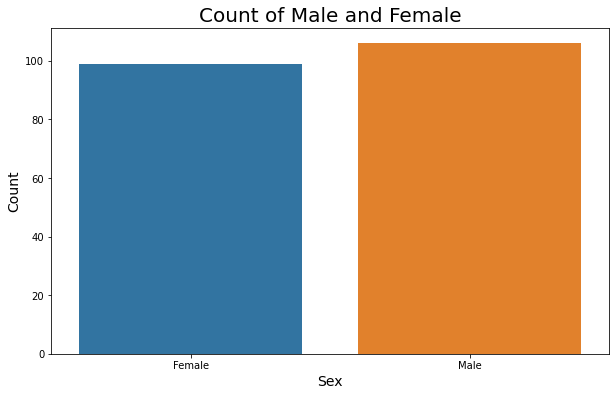

In [10]:
class Occurrence:
     
     def __init__(self, df):
          self.df = df
          
     def Count_Plot(self):
          """
          Generate  a bar plot of the count of each unique value in a column.
          """

          import matplotlib.pyplot as plt
          import seaborn as sns
          plt.figure(figsize=(10, 6))
          sns.countplot(x = 'Sex', data = self.df)
          plt.title("Count of Male and Female",  fontsize = 20)
          plt.xlabel("Sex", fontsize=14)
          plt.ylabel("Count", fontsize=14)
          plt.show()
          
data_file = "C:/InhouseInternship/majorproject7/Test set.csv"
df = pd.read_csv(data_file)
sol = Occurrence(df)
sol.Count_Plot()


# Frequency Count with dark background

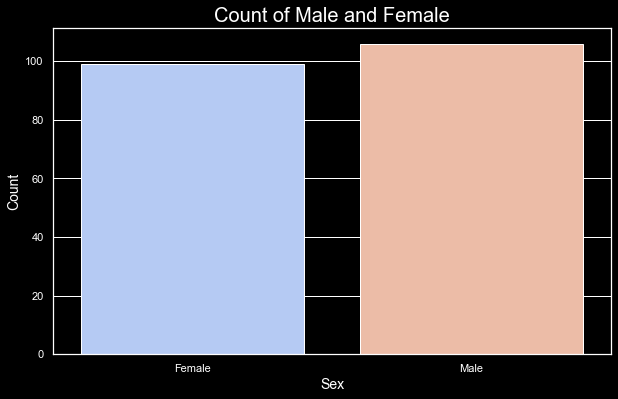

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class Occurrence:
    def __init__(self, df):
        self.df = df

    def Count_Plot(self):
        """
        Generate a bar plot of the count of each unique value in the 'Sex' column.
        """
        # Set the Seaborn style to dark and adjust other settings
        sns.set(style="darkgrid")
        plt.figure(figsize=(10, 6))

        # Create the count plot
        sns.countplot(x='Sex', data=self.df, palette="coolwarm")

        # Set dark background color for both figure and axes
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')

        # Titles and labels with white text color for better visibility
        plt.title("Count of Male and Female", fontsize=20, color='white')
        plt.xlabel("Sex", fontsize=14, color='white')
        plt.ylabel("Count", fontsize=14, color='white')

        # Change tick label colors to white for dark background
        plt.xticks(color='white')
        plt.yticks(color='white')

        plt.show()


data_file = "C:/InhouseInternship/majorproject7/Test set.csv"
df = pd.read_csv(data_file)
sol = Occurrence(df)
sol.Count_Plot()


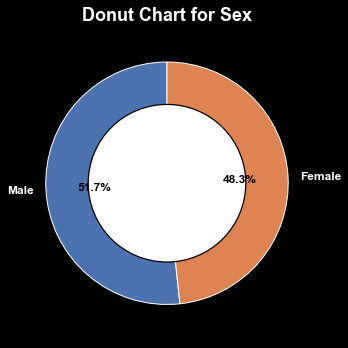

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

class DonutChartGenerator:
    def __init__(self, data):
        self.data = data

    def generate_donut_chart(self, column_name):
        # Group the data by the column and get the value counts
        value_counts = self.data[column_name].value_counts()

        # Plot the donut chart with larger size and label adjustments
        fig, ax = plt.subplots(figsize=(5, 5))  # Increase figure size
        wedges, texts, autotexts = ax.pie(
            value_counts, 
            labels=value_counts.index, 
            autopct='%1.1f%%', 
            startangle=90, 
            wedgeprops=dict(width=1),  # Increase wedge width
            textprops=dict(color="white", fontsize=12)  # Adjust text size and color
        )

        # Spread the labels further out to avoid overlap
        for text in texts:
            text.set_fontsize(12)  # Adjust the label font size
            text.set_fontweight('bold')  # Set labels bold
            text.set_color('white')  # Label color set to white
        
        for autotext in autotexts:
            autotext.set_color('black')  # Change percentage text color to black for better readability
            autotext.set_fontsize(12)  # Adjust percentage font size
            autotext.set_fontweight('bold')  # Set percentage bold

        # Add a circle at the center to make it a donut chart
        centre_circle = plt.Circle((0, 0), 0.65, color='black', fc='white', linewidth=1.25)
        fig.gca().add_artist(centre_circle)

        # Equal aspect ratio ensures that the pie is drawn as a circle
        ax.axis('equal')  
        plt.title(f'Donut Chart for {column_name}', fontsize=18, weight='bold', color='white')
        fig.patch.set_facecolor('black')  # Set figure background to black
        ax.set_facecolor('black')  # Set axis background to black
        plt.tight_layout()
        plt.show()

    def plot_inventory_donut(self):
        self.generate_donut_chart('Sex')

   



data = pd.read_csv("C:/InhouseInternship/majorproject7/Test set.csv" )

# Create an instance of the class and plot the donut charts
donut_chart = DonutChartGenerator(data)
donut_chart.plot_inventory_donut()


# Find the z-score and gaussian distribution

In [13]:
class Stats:
     
     def __init__(self, df):
          self.df = df
          
     def  calculate_mean(self):
          return self.df.mean()
     
     def calculate_std(self):
          return self.df.std()
     
     def z_score(self):
          return (self.df - self.calculate_mean()) / self.calculate_std()
     
import warnings 
warnings.filterwarnings('ignore')    
data_file = "C:/InhouseInternship/majorproject7/Test set.csv"
df = pd.read_csv(data_file)

# Create an instance of the class and call the method
counter = Stats(df)
print("mean is :")
counter.calculate_mean()


mean is :


Height    160.874125
Weight     69.927028
dtype: float64

In [14]:
print("Standard deviation is :")
counter.calculate_std()

Standard deviation is :


Height    15.171040
Weight    15.462396
dtype: float64

In [15]:
print("Z-Score is :")
counter.z_score()

Z-Score is :


,Height,Sex,Weight
0,-0.959122,NaN,-0.650996
1,0.976946,NaN,0.513288
2,1.472677,NaN,0.142602
3,1.540510,NaN,0.492742
4,-1.883316,NaN,-0.953186
...,...,...,...
200,-0.381240,NaN,0.473528
201,-0.771089,NaN,1.507183
202,0.471738,NaN,-0.406561
203,0.773445,NaN,-0.953089


# Plot the weight column 

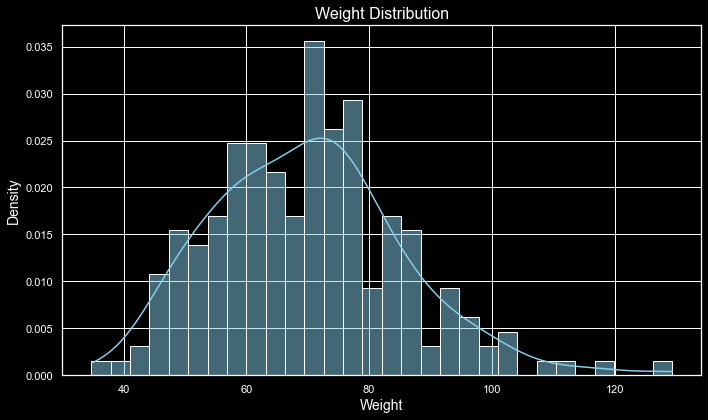

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class WeightDistributionPlotter:
    def __init__(self, data_file, column):
        self.data_file = data_file
        self.column = column
        self.data = self.load_data()

    def load_data(self):
        """
        Load the dataset and extract the specified column.
        """
        df = pd.read_csv(self.data_file)
        return df[self.column].dropna()



    def plot_distribution(self):
        """
        Plot the distribution of the specified column with a dark background.
        """
        sns.set(style="darkgrid")
        plt.figure(figsize=(10, 6))


        # Plot the histogram with a density curve
        sns.histplot(self.data,
                     bins=30, 
                     kde=True,
                     color='skyblue',
                     stat="density"
                     )


        # Set the background to black
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')


        # Customize the title and labels with white color
        plt.title(
             f"{self.column} Distribution",
             fontsize=16, color='white'
             )
        
        plt.xlabel(
             self.column,
             fontsize=14, 
             color='white'
             )
        
        
        plt.ylabel(
             "Density",
             fontsize=14,
             color='white'
             )

        
        # Customize the ticks with white color
        plt.xticks(color='white')
        plt.yticks(color='white')

        # Display the plot
        plt.tight_layout()
        plt.show()


data_file = r"C:\InhouseInternship\majorproject7\Test set.csv"
column = 'Weight'
plotter = WeightDistributionPlotter(data_file, column)
plotter.plot_distribution()


# Plot the Height column

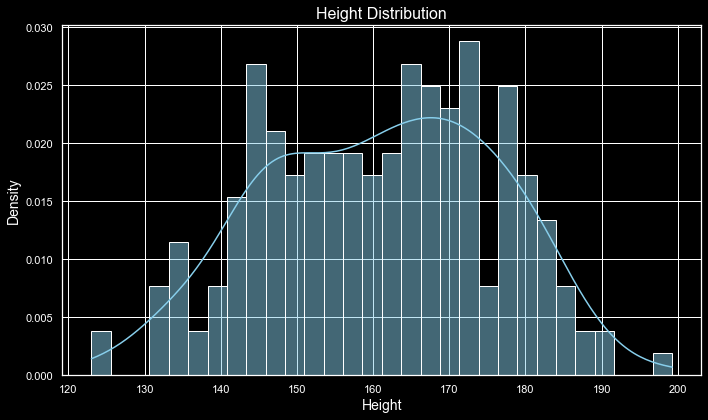

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class WeightDistributionPlotter:
    def __init__(self, data_file, column):
        self.data_file = data_file
        self.column = column
        self.data = self.load_data()

    def load_data(self):
        """
        Load the dataset and extract the specified column.
        """
        df = pd.read_csv(self.data_file)
        return df[self.column].dropna()



    def plot_distribution(self):
        """
        Plot the distribution of the specified column with a dark background.
        """
        sns.set(style="darkgrid")
        plt.figure(figsize=(10, 6))


        # Plot the histogram with a density curve
        sns.histplot(self.data,
                     bins=30, 
                     kde=True,
                     color='skyblue',
                     stat="density"
                     )


        # Set the background to black
        plt.gca().set_facecolor('black')
        plt.gcf().set_facecolor('black')


        # Customize the title and labels with white color
        plt.title(
             f"{self.column} Distribution",
             fontsize=16, color='white'
             )
        
        plt.xlabel(
             self.column,
             fontsize=14, 
             color='white'
             )
        
        
        plt.ylabel(
             "Density",
             fontsize=14,
             color='white'
             )

        
        # Customize the ticks with white color
        plt.xticks(color='white')
        plt.yticks(color='white')

        # Display the plot
        plt.tight_layout()
        plt.show()


data_file = r"C:\InhouseInternship\majorproject7\Test set.csv"
column = 'Height'
plotter = WeightDistributionPlotter(data_file, column)
plotter.plot_distribution()
